In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
METRICS_COLS = ['timestamp', 'utilization.gpu [%]']

### trace for 1 second

In [3]:
file_csv='monitor_log_1s.csv'

#df_trace = pd.read_csv(file_csv, names=METRICS_COLS, engine='python')
df_trace = pd.read_csv(file_csv,  engine='python')

# df_trace['timestamp'] = pd.to_datetime(df_trace['timestamp']).dt.strftime('%H:%M:%S')
# df_trace[:20]

In [20]:
df_trace[:13]

,timestamp,utilization.gpu [%]
0,2018/02/26 22:25:16.735,0 %
1,2018/02/26 22:25:16.737,0 %
2,2018/02/26 22:25:16.738,0 %
3,2018/02/26 22:25:16.739,0 %
4,2018/02/26 22:25:16.741,0 %
5,2018/02/26 22:25:16.742,0 %
6,2018/02/26 22:25:16.743,0 %
7,2018/02/26 22:25:16.746,0 %
8,2018/02/26 22:25:16.749,0 %
9,2018/02/26 22:25:16.749,0 %


In [5]:
df_trace.shape[0] / 12.

91.0

In [ ]:
def convert_to_sec(hour_min_sec):
    result_format = hour_min_sec
    [hours, minutes, seconds] = hour_min_sec.split(":")
    #print hours, minutes, seconds
    result_format = float(hours) * 3600. + float(minutes) * 60. + float(seconds)
    #print result_format
    return result_format

In [6]:

#
# monitor every 1 second
#

sampling_records = 0
sampling_time = 0
count_gpus = 0

for index, row in df_trace.iterrows():
    #print index, row[0], row[1]
    
    #
    # process the time
    #
    hour_min_sec = row[0].split(' ')[1]
    hour_min_sec = convert_to_sec(hour_min_sec)
    
    #
    # process the utilization
    #
    gpu_util = float(row[1][:-2]) * 0.01
    
    hour_min_sec = int(hour_min_sec) # no decimal : measuring the seconds


    
    if sampling_time <> hour_min_sec:
        #print index, row[0]
        sampling_time = hour_min_sec
        sampling_records = sampling_records + 1
        
    if sampling_records == 1:
        count_gpus = count_gpus + 1
        
sampling_records = sampling_records - 1
        
print('monitoring records array : {} x {}'.format(count_gpus, sampling_records))

monitoring records array : 12 x 91


In [7]:
#
# allocate numpy array
#
util_array = np.zeros((count_gpus, sampling_records)) # each column is each time step

In [8]:
#
# monitor every 1 second
#

sampling_time = 0

for index, row in df_trace.iterrows():
    #print index, row[0], row[1]
    
    #
    # process the time
    #
    hour_min_sec = row[0].split(' ')[1]
    hour_min_sec = convert_to_sec(hour_min_sec)
    
    #
    # process the utilization
    #
    gpu_util = float(row[1][:-2]) * 0.01
    
    hour_min_sec = int(hour_min_sec) # no decimal : measuring the seconds

#     if sampling_time <> hour_min_sec:
#         #print index, row[0]
#         sampling_time = hour_min_sec
#         pos = pos + 1
    
    col_id =  int(index) / count_gpus
    row_id =  int(index) % count_gpus
    
    util_array[row_id, col_id] = gpu_util
        

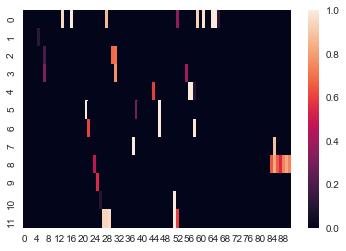

In [18]:
#
# heatmap
#
import seaborn as sns

sns.set()

ax = sns.heatmap(util_array)

### read 0.5 second trace

In [22]:
file_csv='monitor_log_0.5s.csv'

df_trace = pd.read_csv(file_csv,  engine='python')

df_trace[:15]

,timestamp,utilization.gpu [%]
0,2018/02/26 22:31:36.591,0 %
1,2018/02/26 22:31:36.592,0 %
2,2018/02/26 22:31:36.594,0 %
3,2018/02/26 22:31:36.595,0 %
4,2018/02/26 22:31:36.596,0 %
5,2018/02/26 22:31:36.600,0 %
6,2018/02/26 22:31:36.603,0 %
7,2018/02/26 22:31:36.604,0 %
8,2018/02/26 22:31:36.605,0 %
9,2018/02/26 22:31:36.606,0 %


In [30]:
count_gpus = 12
sampling_records = int(df_trace.shape[0] / 12.)
print sampling_records

224


In [31]:
print('monitoring records array : {} x {}'.format(count_gpus, sampling_records))

monitoring records array : 12 x 224


In [32]:
util_array = np.zeros((count_gpus, sampling_records)) # each column is each time step

In [33]:
#
# monitor every 0.5 second
#

for index, row in df_trace.iterrows():
    #print index, row[0], row[1]
    gpu_util = float(row[1][:-2]) * 0.01 # process the utilization
    
    col_id =  int(index) / count_gpus
    row_id =  int(index) % count_gpus
    
    util_array[row_id, col_id] = gpu_util

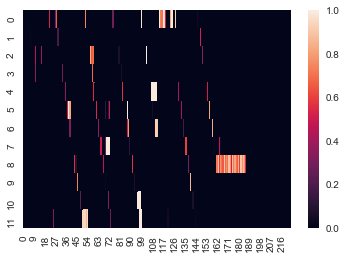

In [34]:
#
# heatmap
#
import seaborn as sns

sns.set()

ax = sns.heatmap(util_array)

### read 0.1 second trace

In [36]:
file_csv='monitor_log_0.1s.csv'

df_trace = pd.read_csv(file_csv,  engine='python')

df_trace[:15]

,timestamp,utilization.gpu [%]
0,2018/02/26 22:28:22.414,0 %
1,2018/02/26 22:28:22.415,0 %
2,2018/02/26 22:28:22.416,0 %
3,2018/02/26 22:28:22.417,0 %
4,2018/02/26 22:28:22.419,0 %
5,2018/02/26 22:28:22.420,0 %
6,2018/02/26 22:28:22.421,0 %
7,2018/02/26 22:28:22.421,0 %
8,2018/02/26 22:28:22.422,0 %
9,2018/02/26 22:28:22.424,0 %


In [37]:
count_gpus = 12
sampling_records = int(df_trace.shape[0] / 12.)
print sampling_records

print('monitoring records array : {} x {}'.format(count_gpus, sampling_records))

util_array = np.zeros((count_gpus, sampling_records)) # each column is each time step

820
monitoring records array : 12 x 820


In [38]:
#
# monitor every 0.5 second
#
for index, row in df_trace.iterrows():
    #print index, row[0], row[1]
    gpu_util = float(row[1][:-2]) * 0.01 # process the utilization
    
    col_id =  int(index) / count_gpus
    row_id =  int(index) % count_gpus
    
    util_array[row_id, col_id] = gpu_util

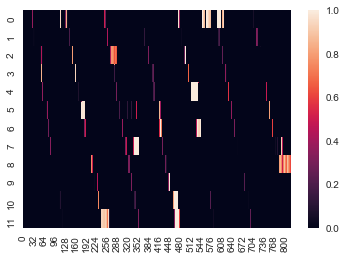

In [41]:
#
# heatmap
#

sns.set()
ax = sns.heatmap(util_array)
fig = ax.get_figure()
fig.savefig("test.png")